In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import prepare


import telco_acquire


import wrangle

from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures

import sklearn.preprocessing

from sklearn.metrics import mean_squared_error, explained_variance_score

In [37]:
# using mall data to create our linear regression model

df = pd.read_csv('student_grades.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [45]:
# prepare our mall data



df = wrangle.wrangle_grades()
df

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97
5,79,70,85,81
6,92,89,94,93
7,73,70,75,76
8,70,65,78,77
10,58,65,70,68


In [47]:
train, test, validate = wrangle.split_data(df)
train

,exam1,exam2,exam3,final_grade
81,83,80,86,85
97,92,89,94,93
33,73,70,75,76
47,70,65,78,77
102,57,65,75,65
49,58,65,70,68
88,58,65,70,68
1,98,93,96,95
50,57,65,75,65
59,73,70,75,76


In [48]:
# scaling our data

scaler = sklearn.preprocessing.MinMaxScaler()
cols_to_scale = ['exam1', 'exam2', 'exam3']

train_scaled, test_scaled, validate_scaled = wrangle.scale_data(train,test, validate, scaler = scaler, cols_to_scale = cols_to_scale )

In [49]:
train_scaled

,final_grade,exam1_scaled,exam2_scaled,exam3_scaled
81,85,0.604651,0.535714,0.615385
97,93,0.813953,0.857143,0.923077
33,76,0.372093,0.178571,0.192308
47,77,0.302326,0.000000,0.307692
102,65,0.000000,0.000000,0.192308
49,68,0.023256,0.000000,0.000000
88,68,0.023256,0.000000,0.000000
1,95,0.953488,1.000000,1.000000
50,65,0.000000,0.000000,0.192308
59,76,0.372093,0.178571,0.192308


In [50]:
# separating our independent and dependent variables


x_train_scaled = train_scaled.drop(columns = 'final_grade')

x_validate_scaled = validate_scaled.drop(columns = 'final_grade')

x_test_scaled = test_scaled.drop(columns = 'final_grade')


y_train = train_scaled[['final_grade']]

y_validate = validate_scaled[['final_grade']]

y_test = test_scaled[['final_grade']]



In [51]:
# lets begin modeling but first, we must create our baseline


print(y_train.mean())
print()
print(y_train.median())

final_grade    81.424658
dtype: float64

final_grade    81.0
dtype: float64


**we will use our median as the baseline**

In [52]:
# lets calcualte our rmse. To do this, we must get our pred using the baseline. Basically all the predicted values
# will be the median

baseline = y_train.median()


y_baseline_pred = np.full(len(y_train), baseline)


# now lets calculate rmse

baseline_rmse = (mean_squared_error(y_train, y_baseline_pred))**(1/2)

baseline_rmse

10.634011086171666

In [57]:
# lets start with linear regression model

lm = LinearRegression(normalize = True)

lm = lm.fit(x_train_scaled, y_train)

y_lm_pred = lm.predict(x_train_scaled)

lm_rmse = (mean_squared_error(y_train, y_lm_pred)) **(1/2)

lm_rmse

1.7156570386665957

In [59]:
# lets try LASSOLARS


# create the object
lars = LassoLars(alpha = 0)


# fit the object
lars = lars.fit(x_train_scaled, y_train)


# predict with the object
y_lars_pred = lars.predict(x_train_scaled)


# calculate the rmse
lars_rmse = (mean_squared_error(y_train, y_lars_pred)) **(1/2)

lars_rmse

1.7156570386665946

In [63]:
# lets try polynomial features with linear regression


# create polynomial object
pf = PolynomialFeatures(degree = 2)

# fitting the object
pf = pf.fit(x_train_scaled)


# transforming our training data set
x_train_scaled_squared = pf.transform(x_train_scaled)



# lets get the Linear Regression

lm_squared = LinearRegression()


# fit the linear regression object

lm_squared = lm_squared.fit(x_train_scaled_squared, y_train)

#predict with the object

y_lm_squared_pred = lm_squared.predict(x_train_scaled_squared)


# lets get rmse

lm_squared_rmse = (mean_squared_error(y_train, y_lm_squared_pred)) **(1/2)

lm_squared_rmse

0.6733387347781709

In [69]:
# lets validate with all three

# with linear regression
y_validate_lm_pred = lm.predict(x_validate_scaled)

lm_validate_rmse = (mean_squared_error(y_validate, y_validate_lm_pred)) **(1/2)
lm_validate_rmse

1.584557728021663

In [70]:
# with lassolars

y_validate_lars_pred = lars.predict(x_validate_scaled)

lars_validate_rmse = (mean_squared_error(y_validate, y_validate_lars_pred)) **(1/2)

lars_validate_rmse

1.5845577280216447

In [73]:
# with polynomial but we have to get the squared of our validate

x_validate_squared = pf.transform(x_validate_scaled)



# lets predict

y_validate_lm_squared_pred = lm_squared.predict(x_validate_squared)


lm_squared_validate_rmse = (mean_squared_error(y_validate, y_validate_lm_squared_pred)) **(1/2)

lm_squared_validate_rmse

1.1753579676302772

In [77]:
# out of all three models, polynomial + linear regression performed better in validate data set. So, we will use the same 
# model with our test data set. 

# we have to get the x_test_scaled squared first


x_test_squared = pf.transform(x_test_scaled)



# lets get our predictions

y_test_lm_squared_pred = lm_squared.predict(x_test_squared)



# lets get our rmse

lm_squared_test_rmse = (mean_squared_error(y_test, y_test_lm_squared_pred)) **(1/2)

lm_squared_test_rmse

0.6354586091144696

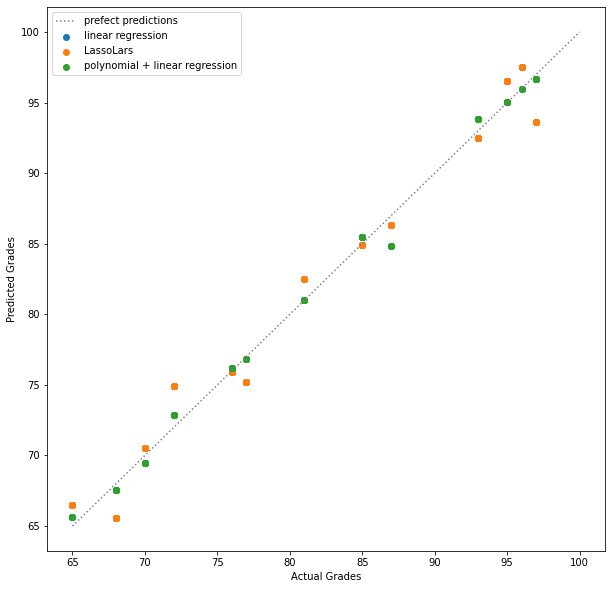

In [102]:

# plotting how our models did with the training data set

plt.figure(figsize = (10,10))

plt.scatter(y_train.final_grade, y_lm_pred, label = 'linear regression' )
plt.scatter(y_train.final_grade, y_lars_pred, label = 'LassoLars')
plt.scatter(y_train.final_grade, y_lm_squared_pred, label = 'polynomial + linear regression')
plt.plot([65,100],[65,100], ls = ':', c = 'grey', label = 'prefect predictions')
plt.legend()
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.show()

**we can do the same thing with our models performance on validate data set and test data set**

In [106]:
df = telco_acquire.get_telco_data()

In [109]:
df = wrangle.wrangle_telco(df)

In [110]:
df

,customer_id,monthly_charges,tenure,total_charges
1793,0016-QLJIS,90.45,65,5957.90
1794,0017-DINOC,45.20,54,2460.55
1795,0019-GFNTW,45.05,56,2560.10
1796,0056-EPFBG,39.40,20,825.40
1797,0078-XZMHT,85.15,72,6316.20
...,...,...,...,...
7038,9950-MTGYX,20.30,28,487.95
7039,9953-ZMKSM,25.25,63,1559.30
7040,9964-WBQDJ,24.40,71,1725.40
7041,9972-EWRJS,19.25,67,1372.90


In [111]:
train, test, validate = wrangle.split_data(df)

In [112]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
5510,9861-PDSZP,108.05,72,7806.60
5431,8041-TMEID,108.50,63,6991.90
2383,9443-JUBUO,65.25,72,4478.85
2381,9415-ZNBSX,89.00,70,6293.20
6670,3976-HXHCE,19.30,72,1414.80


In [113]:
cols_to_scale = ['monthly_charges', 'tenure']
scaler = sklearn.preprocessing.MinMaxScaler()

In [114]:
train_scaled, test_scaled, validate_scaled = wrangle.scale_data(train, test, validate, cols_to_scale = cols_to_scale, scaler = scaler)

In [145]:
train_scaled

,total_charges,monthly_charges_scaled,tenure_scaled
count,1217.000000,1217.000000,1217.000000
mean,3701.473870,0.419124,0.790607
std,2567.221506,0.344654,0.248473
min,20.350000,0.000000,0.000000
25%,1275.600000,0.055306,0.661972
50%,3533.600000,0.455904,0.887324
75%,5986.450000,0.713004,0.985915
max,8672.450000,1.000000,1.000000


In [116]:
x_train_scaled = train_scaled.drop(columns = ['customer_id', 'total_charges'])
x_validate_scaled = validate_scaled.drop(columns = ['customer_id', 'total_charges'])
x_test_scaled = test_scaled.drop(columns = ['customer_id', 'total_charges'])


y_train = train[['total_charges']]
y_validate = validate[['total_charges']]
y_test = test[['total_charges']]


total_charges    3533.6
dtype: float64


array([[<AxesSubplot:title={'center':'total_charges'}>]], dtype=object)

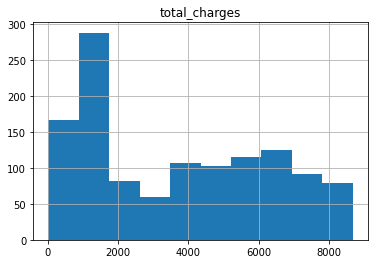

In [120]:
# lets create our baseline

print(y_train.median())


y_train.hist()

baseline = y_train.median()

In [127]:
# lets get our prediction using y_baseline

y_baseline_pred = np.full(len(y_train), y_train.median() )
baseline_rmse = (mean_squared_error(y_train, y_baseline_pred))**(1/2)
baseline_rmse

2571.651692869223

In [124]:
mean_squared_error(y_train, y_baseline_pred)

6613392.429437141

In [152]:
lm = LinearRegression(normalize = True)

lm = lm.fit(x_train_scaled, y_train)

y_lm_pred = lm.predict(x_train_scaled)

lm_rmse = (mean_squared_error(y_train, y_lm_pred))**(1/2)

In [153]:
lm_rmse

492.3515563314217

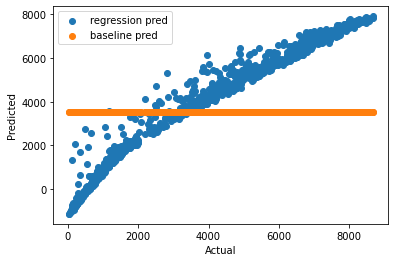

In [154]:
plt.scatter(y_train.total_charges, y_lm_pred, label = 'regression pred')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(y_train.total_charges, y_baseline_pred, label = 'baseline pred')
plt.legend()
plt.show()

In [155]:
# lets try lassolars
lars = LassoLars(alpha = 0)
lars = lars.fit(x_train_scaled, y_train)
y_lars_pred = lars.predict(x_train_scaled)
lars_rmse = (mean_squared_error(y_train, y_lars_pred))**(1/2)
lars_rmse

492.3515563314218

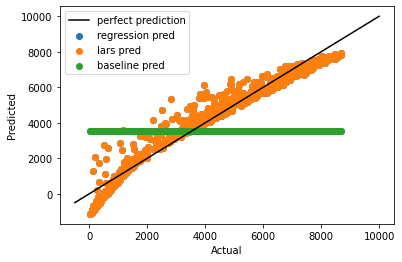

In [168]:
plt.scatter(y_train.total_charges, y_lm_pred, label = 'regression pred')
plt.scatter(y_train.total_charges, y_lars_pred, label = 'lars pred')
plt.plot([-500,10000], [-500,10000], ls = '-', label = 'perfect prediction', c = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(y_train.total_charges, y_baseline_pred, label = 'baseline pred')
plt.legend()
plt.show()

In [172]:
# sklearn.metrics.r2_score(y_train, y_lm_pred)

lars.score(x_train_scaled, y_train)

0.9631887174706518